In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
data=pd.read_csv("Advertising.csv",index_col=0)
#create an instance of the linearregression model
lm = LinearRegression()
features = ["TV", "Radio", "Newspaper"]
x = data[features]
y = data.Sales
kf=KFold(n_splits=10)
scores=[]
for train,test in kf.split(x,y):
    model=lm.fit(x.values[train],y.values[train])
    score=model.score(x.values[test],y.values[test])
    print (score)
    scores.append(score)
    print("the mean score for %d-fold cross validation is %.2f" % (kf.get_n_splits(), np.mean(np.array(scores))))

0.8730269590985928
the mean score for 10-fold cross validation is 0.87
0.8581613040148899
the mean score for 10-fold cross validation is 0.87
0.9296872316691296
the mean score for 10-fold cross validation is 0.89
0.8901327151837942
the mean score for 10-fold cross validation is 0.89
0.9314649771656575
the mean score for 10-fold cross validation is 0.90
0.9313873454259836
the mean score for 10-fold cross validation is 0.90
0.7597900975397525
the mean score for 10-fold cross validation is 0.88
0.912170969514483
the mean score for 10-fold cross validation is 0.89
0.8389175289923594
the mean score for 10-fold cross validation is 0.88
0.9288231093749743
the mean score for 10-fold cross validation is 0.89


In [7]:
from sklearn.model_selection import KFold

In [8]:
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [9]:
from sklearn.model_selection import RepeatedKFold

In [10]:
rkf=RepeatedKFold(n_splits=4,n_repeats=2,random_state=True)

In [11]:
data=pd.read_csv("Advertising.csv", index_col=0)

In [12]:
lm=LinearRegression()

In [13]:
features=["TV","Radio","Newspaper"]

In [14]:
x=data[features]

In [15]:
y=data.Sales

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
scores=cross_val_score(lm,x,y,cv=5)

In [18]:
print(scores)

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]


In [19]:
print ("average score %.2f" %scores.mean())

average score 0.89


In [20]:
rkf=RepeatedKFold(n_splits=4,n_repeats=2,random_state=True)

In [21]:
scores=cross_val_score(lm,x,y,cv=rkf)

In [22]:
print(scores)

[0.91562136 0.9035448  0.82960141 0.90589845 0.86904998 0.90912103
 0.8533589  0.92588745]


In [23]:
print ("average score %.2f" %scores.mean())

average score 0.89


# Regularization
# Overfitting'i önlemek için ekstra bilgi ekleme k için kullanılıyor

In [24]:
from sklearn.linear_model import Ridge

In [25]:
data=pd.read_csv("Advertising.csv",index_col=0)

In [26]:
#create an instance of the LinearRegression model
model_ridge=Ridge(alpha=0.5)

In [27]:
features=["TV","Radio","Newspaper"]

In [28]:
x=data[features]

In [29]:
y=data.Sales

In [30]:
scores=cross_val_score(model_ridge,x,y,cv=5)

In [31]:
print (scores)

[0.87865195 0.91763189 0.9293305  0.81444203 0.89547644]


In [32]:
print ("average score %.2f" % scores.mean())

average score 0.89


# Lasso Regression bir regresyon metodu
# Regresyon katsayılarının boyutlarını düşürür. 

In [33]:
from sklearn.linear_model import Lasso

In [34]:
data=pd.read_csv("Advertising.csv",index_col=0)

In [35]:
model_lasso=Lasso(alpha=0.1)

In [36]:
features=["TV","Radio","Newspaper"]

In [37]:
x=data[features]

In [38]:
y=data.Sales

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
scores=cross_val_score(model_lasso,x,y,cv=5)

In [41]:
print (scores)

[0.87883467 0.91766119 0.92946215 0.81509772 0.89517222]


In [42]:
print ("average score %.2f" % scores.mean())

average score 0.89


In [43]:
import matplotlib.pyplot as plt

In [44]:
import sklearn.datasets
import sklearn.model_selection as cv

In [45]:
from sklearn import linear_model

In [46]:
dataset=sklearn.datasets.fetch_california_housing()

In [47]:
x=dataset['data']

In [48]:
y=dataset['target']

In [49]:
x_train,x_test,y_train,y_test=cv.train_test_split(x,y,test_size=0.25,random_state=0)

In [50]:
alphas=np.logspace(-4,-1,10)

In [51]:
scores=np.empty_like(alphas)

0.0001 [ 4.38725041e-01  9.60573216e-03 -1.02607317e-01  6.13113796e-01
 -7.60040055e-06 -4.48887838e-03 -4.17236219e-01 -4.30443252e-01]
0.00021544346900318845 [ 4.38302495e-01  9.61391144e-03 -1.01794733e-01  6.08938831e-01
 -7.56305472e-06 -4.48945068e-03 -4.17101115e-01 -4.30245638e-01]
0.00046415888336127773 [ 4.37392131e-01  9.63153273e-03 -1.00044046e-01  5.99944032e-01
 -7.48259718e-06 -4.49068359e-03 -4.16810078e-01 -4.29819929e-01]
0.001 [ 4.35430588e-01  9.66949146e-03 -9.62719961e-02  5.80564052e-01
 -7.30927570e-06 -4.49333892e-03 -4.16183481e-01 -4.28903173e-01]
0.002154434690031882 [ 4.31204047e-01  9.75125876e-03 -8.81446225e-02  5.38808130e-01
 -6.93591112e-06 -4.49905750e-03 -4.14834520e-01 -4.26929052e-01]
0.004641588833612777 [ 4.22097249e-01  9.92739780e-03 -7.06333349e-02  4.48842020e-01
 -6.13160704e-06 -4.51137374e-03 -4.11930165e-01 -4.22677769e-01]
0.01 [ 4.02474124e-01  1.03068044e-02 -3.29020231e-02  2.54997948e-01
 -4.39905667e-06 -4.53789547e-03 -4.0567889

/home/hign/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV [ 3.81485543e-01  1.12872676e-02  2.20440782e-03  0.00000000e+00
  1.88778147e-06 -3.51349405e-03 -3.39002345e-01 -3.39456784e-01]


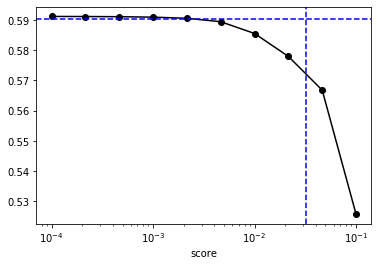

In [52]:
for i,a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(x_train,y_train)
    scores[i]=lasso.score(x_test,y_test)
    print(a, lasso.coef_)
lassocv=linear_model.LassoCV()
lassocv.fit(x,y)
lassocv_score=lassocv.score(x,y)
lassocv_alpha=lassocv.alpha_
print('CV',lassocv.coef_)

plt.plot(alphas,scores,'-ko')
plt.axhline(lassocv_score,color='b',ls='--')
plt.axvline(lassocv_alpha,color='b',ls='--')
plt.xlabel(r'$\alpha$')
plt.xlabel('score')
plt.xscale('log')